# instalaciones librerias

In [ ]:
#instalaciones
!pip install yfinance
!pip install tensorflow
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 482 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=6cf1f5411037da3386306b2d568394b68917110ed58e6c4d69bd3c90cbe4b177
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta


In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 5.2 MB/s 
  Created wheel for pyod: filename=pyod-1.0.6-py3-none-any.whl size=175098 sha256=3b13fa475531568c9da360a8ca5612c733ef02bffbc84a2923dc7f0780e5aabb
  Stored in directory: /root/.cache/pip/wheels/98/93/e6/6d40410d9635ecde42d06041a1ba7f2ee7396e036fcf702e73
Successfully built pyod


In [ ]:
#librerias metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# busquda de parametros
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials

In [ ]:
import pandas as pd
#import MetaTrader5 as mt5
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import tensorflow as t
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as pt
from sklearn.preprocessing import MinMaxScaler

import math
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
import numpy as np
import pandas as pd
import pandas_ta as ta
import sklearn.preprocessing as prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **EXPLORACIÓN DE LOS DATOS:**

In [ ]:
# 1. Extraer data y definir datasets para pruebas

# Data set 1, euro dolar, periodo: 2004 - 2021, frecuencia: 1 dia
# para clasificaicon de dos clases: -1, 1
df_SVMC= pd.read_csv('/content/drive/MyDrive/datasets stmkt/EURO-2CLS.csv',sep=';')
df_SVMC=df_SVMC.set_index('Date')
Y_train_SVM=df_SVMC['Label']
df_SVMC.drop(['Label'],axis=1, inplace=True)


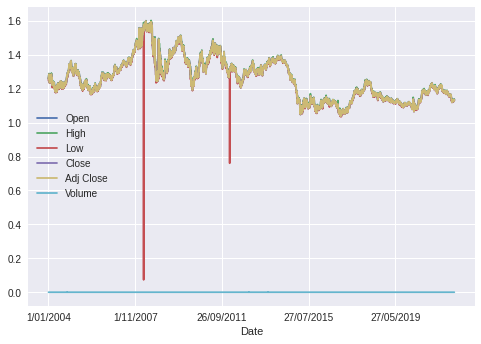

In [ ]:
df_SVMC.plot()

In [ ]:
from pyod.models.knn import KNN

In [ ]:
# Create your own Custom Strategy
df_SVMC.ta.log_return(cumulative=True, append=True)
df_SVMC.ta.percent_return(cumulative=True, append=True)
df_SVMC.tail()
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 10},
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
    ]
)
# To run your "Custom Strategy"

In [ ]:
df_SVMC.ta.strategy(CustomStrategy)

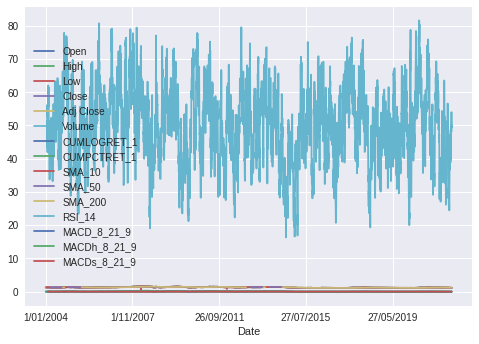

In [ ]:
df_SVMC.plot()

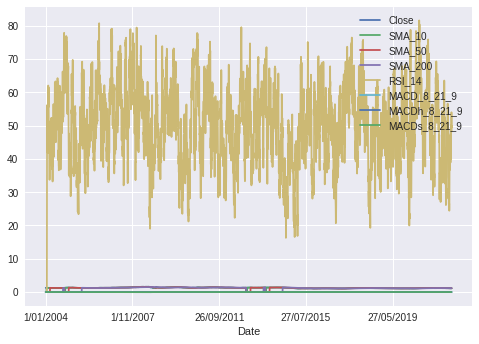

In [ ]:
df_SVMC.drop(['Open','High','Low','Adj Close','Volume','CUMLOGRET_1','CUMPCTRET_1'],axis=1, inplace=True)
df_SVMC=df_SVMC.fillna(0)
df_SVMC.plot()

# NORMALIZACIÓN DE **DATOS**

In [ ]:
spl=int(len(df_SVMC)*0.8)

X_train_SVMC=df_SVMC.iloc[:spl]

X_test_SVMC=df_SVMC[spl:]
print(len(X_train_SVMC))

Y_train_SVM=np.array(Y_train_SVM)

Y_train_SVM_=Y_train_SVM[:spl]

y_test_SVM=Y_train_SVM[spl:]

3744


In [ ]:
sc=StandardScaler()

X_train_SVMC=sc.fit_transform(X_train_SVMC)
X_test_SVMC=sc.transform(X_test_SVMC)

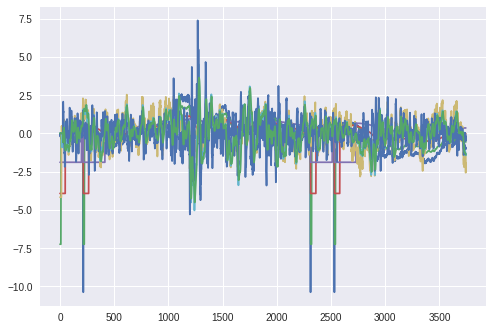

In [ ]:
plt.plot(X_train_SVMC[:,0:20])
plt.show()

In [ ]:
pca=PCA(n_components=3)
X_SVMC_pca_train=pca.fit_transform(X_train_SVMC)
X__SVMC_pca_test=pca.transform(X_test_SVMC)
print(X_SVMC_pca_train)

[[ 2.56920729  6.95426647 -1.05862795]
 [ 2.56920729  6.95426647 -1.05862795]
 [ 2.55452079  6.91256765 -1.08812892]
 ...
 [ 2.92712337  0.45381753  0.52606701]
 [ 3.26957918  0.4599435   0.35794773]
 [ 2.44026829  0.47614717  0.71877735]]


# BUSQUEDA DE HIPERPARAMETROS

In [ ]:
best_score=1.0
metric = 'accuracy'

def objective(space):

    global best_score
    model = SVC(**space)
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model,X_train_SVMC,Y_train_SVM_, cv=kfold, scoring=metric, verbose=False).mean()
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.

    if (score < best_score):
        best_score=score
    return score

In [ ]:
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials
import time
space = {
      'C': hp.choice('C', np.arange(0.005,1.0,0.01)),
      "gamma": hp.choice('gamma',[.01, .1, 1, 5, 10, 100]),
      'kernel': hp.choice('kernel',['linear', 'rbf','sigmoid']),
      'probability':hp.choice('probability',[True])
      }

In [ ]:
n_iter_hopt = 50
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions
seed = 50
kFoldSplits = 5
start = time.time()

best = fmin(objective,
            space = space,
            algo = tpe.suggest,
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.RandomState(seed))

elapsed_time_hopt = time.time() - start

100%|██████████| 50/50 [06:07<00:00,  7.34s/it, best loss: 0.29140422524149834]


In [ ]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 367.23 seconds for 50 candidates. Accuracy reached: 70.860
Optimal parameters found: {'C': 99, 'gamma': 1, 'kernel': 1, 'probability': 0}


# MODELO SVC CON PARAMETROS ENCONTRADOS

In [ ]:
#modelo SVc prueba kernel lineal
svc=SVC(C=99,kernel='rbf',gamma=1,probability=0)
svc.fit(X_train_SVMC,Y_train_SVM_)
#y prediction from svr
y_pred=svc.predict(X_test_SVMC)


In [ ]:
print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1  1
  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1
  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1
  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1
  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1

In [ ]:
print(classification_report(y_test_SVM,y_pred))

              precision    recall  f1-score   support

          -1       0.72      0.70      0.71       473
           1       0.70      0.73      0.71       463

    accuracy                           0.71       936
   macro avg       0.71      0.71      0.71       936
weighted avg       0.71      0.71      0.71       936



# OPTUNA

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.8 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 209 kB 56.6 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 147 kB 68.6 MB/s 
     |████████████████████████████████| 112 kB 64.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=fc2985949fe26a44312f857851fffea422b4d9a80e23a8349e25f26b1e495daa
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [ ]:
x_optuna=X_train_SVMC
y_optuna=Y_train_SVM_

In [ ]:
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.0001,300.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVC(kernel=kernel,degree=degree,gamma=gamma,C=c)
   model.fit(x_optuna,y_optuna)
   accuracy = model.score(X_test_SVMC,y_test_SVM)
   return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,n_jobs=-1)

[I 2022-12-03 10:29:48,820] A new study created in memory with name: no-name-916e4b15-9572-4312-86c8-a78127dac18a
[I 2022-12-03 10:29:51,256] Trial 0 finished with value: 0.4946581196581197 and parameters: {'kernel': 'rbf', 'C': 0.0002200845982604519, 'gamma': 'auto', 'degree': 3}. Best is trial 0 with value: 0.4946581196581197.
[I 2022-12-03 10:29:51,356] Trial 1 finished with value: 0.4946581196581197 and parameters: {'kernel': 'rbf', 'C': 0.0022160784262242493, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.4946581196581197.
[I 2022-12-03 10:29:52,039] Trial 2 finished with value: 0.6623931623931624 and parameters: {'kernel': 'linear', 'C': 0.9900009227903572, 'gamma': 'scale', 'degree': 2}. Best is trial 2 with value: 0.6623931623931624.
[I 2022-12-03 10:29:52,043] Trial 3 finished with value: 0.5737179487179487 and parameters: {'kernel': 'poly', 'C': 0.00211804393581819, 'gamma': 'scale', 'degree': 1}. Best is trial 2 with value: 0.6623931623931624.
[I 2022-12-03 10

In [ ]:
trial=study.best_trial
print("Best Tuning Parameters : {} \n with accuracy of : {:.2f} %".format(trial.params,trial.value*100))

Best Tuning Parameters : {'kernel': 'rbf', 'C': 66.05829919919614, 'gamma': 'auto', 'degree': 2} 
 with accuracy of : 74.25 %


In [ ]:
#modelo SVc prueba kernel lineal
svc2=SVC(C=66.0582,kernel='rbf',degree=2,gamma='auto',probability=0)
svc2.fit(X_train_SVMC,Y_train_SVM_)
#y prediction from svr
y_pred2=svc2.predict(X_test_SVMC)

In [ ]:
accuracy_optuna=accuracy_score(y_test_SVM,y_pred2)
print(accuracy_optuna)

0.7425213675213675


In [ ]:
print(classification_report(y_test_SVM,y_pred2))

              precision    recall  f1-score   support

          -1       0.77      0.70      0.73       473
           1       0.72      0.78      0.75       463

    accuracy                           0.74       936
   macro avg       0.74      0.74      0.74       936
weighted avg       0.74      0.74      0.74       936



## SVR

In [ ]:
import optuna
from sklearn.svm import SVR
# 1. Define an objective function to be maximized.
def objective(trial):
   kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
   c=trial.suggest_float("C",0.0001,300.0,log=True)
   gamma=trial.suggest_categorical('gamma',['auto','scale'])
   degree=trial.suggest_int("degree",1,3,log=True)
   model =SVR(kernel=kernel,degree=degree,gamma=gamma,C=c)
   model.fit(x_optuna,y_optuna)
   accuracy = model.score(X_test_SVMC,y_test_SVM)
   return accuracy